# Regresión lineal Titanic


### 1. Análisis exploratorio de datos

In [1]:
#1 Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc

In [15]:
#Importar librerias
import pandas as pd #Manejo y análisis de estructuras de datos
import numpy as mp # Cálculo numético y análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt #Creación de gráficos en dos dimensiones

#librerias para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression #-> libreria para Regresion Linea
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np


In [16]:
#Lectura de datos en  Python y cargamos en la variable de de Datos7  
db = pd.read_csv('D:\Proyecto2024\Data\Titanic-Dataset.csv') 

In [17]:
## Convertir variable categorica sexo a numerica, reemplazar femenino 1 y masculino 0
db['Sex'] = db['Sex'].replace({'female': 1, 'male': 0})

In [5]:
db.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Descripción de los datos
descripcion_columnas = db[['Age', 'Survived', 'Fare', 'Pclass', 'Parch']].describe()
print(descripcion_columnas)

              Age    Survived        Fare      Pclass       Parch
count  714.000000  891.000000  891.000000  891.000000  891.000000
mean    29.699118    0.383838   32.204208    2.308642    0.381594
std     14.526497    0.486592   49.693429    0.836071    0.806057
min      0.420000    0.000000    0.000000    1.000000    0.000000
25%     20.125000    0.000000    7.910400    2.000000    0.000000
50%     28.000000    0.000000   14.454200    3.000000    0.000000
75%     38.000000    1.000000   31.000000    3.000000    0.000000
max     80.000000    1.000000  512.329200    3.000000    6.000000


In [18]:
#Lectura de datos para análsis exploratorio
db.head(891)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


## 2. Realizar limpieza de datos

Text(0.5, 1.0, 'Representación de datos atipicos y faltantes para tarifa')

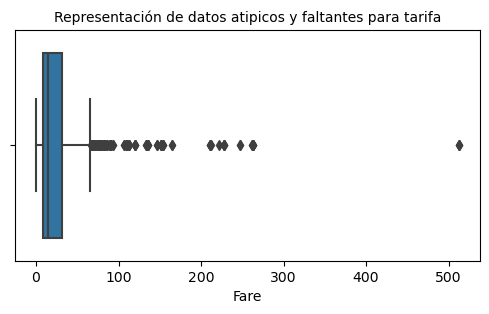

In [8]:
#Identificación de datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=db['Fare']) 
plt.title('Representación de datos atipicos y faltantes para tarifa', fontsize=10)
#Text(0.5, 1.0, 'Identificación datos faltantes')

Text(0.5, 1.0, 'Representación de datos atipicos y faltantes de edad')

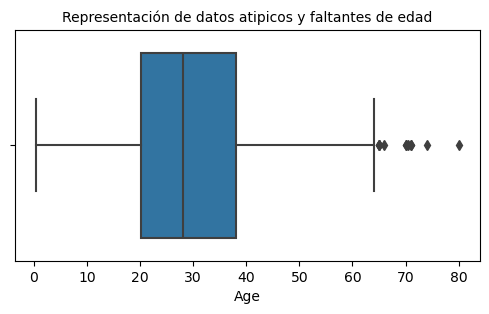

In [19]:
#Identificación de datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=db['Age']) 
plt.title('Representación de datos atipicos y faltantes de edad', fontsize=10)
#Text(0.5, 1.0, 'Identificación datos faltantes')

In [20]:
# Calcular cuartiles y IQR
q1 = 20.125000
q3 = 38.000000 
iqr = q3 - q1

# Calcular límites de los bigotes
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
print("Limite inferior es: ", limite_inferior)
print("Limite superior es: ", limite_superior )

Limite inferior es:  -6.6875
Limite superior es:  64.8125


In [11]:
#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [21]:
##Para valores  nulos
print("Cantidad de datos de columna sobreviviente sin información: ",db['Survived'].isnull().sum())  
print("Cantidad de datos de columna clase sin información: ",db['Pclass'].isnull().sum())  
print("Cantidad de datos de columna sexo sin información: ",db['Sex'].isnull().sum())  
print("Cantidad de datos de columna edad sin información: ",db['Age'].isnull().sum())  
print("Cantidad de datos de columna SibSp sin información: ",db['SibSp'].isnull().sum())  
print("Cantidad de datos de columna Path sin información: ",db['Parch'].isnull().sum())  
print("Cantidad de datos de columna Ticket sin información: ",db['Ticket'].isnull().sum())  
print("Cantidad de datos de columna Tarifa sin información: ",db['Fare'].isnull().sum())  
print("Cantidad de datos de columna Cabina sin información: ",db['Cabin'].isnull().sum())  
print("Cantidad de datos de columna Embarcación sin información: ",db['Embarked'].isnull().sum())  

Cantidad de datos de columna sobreviviente sin información:  0
Cantidad de datos de columna clase sin información:  0
Cantidad de datos de columna sexo sin información:  0
Cantidad de datos de columna edad sin información:  177
Cantidad de datos de columna SibSp sin información:  0
Cantidad de datos de columna Path sin información:  0
Cantidad de datos de columna Ticket sin información:  0
Cantidad de datos de columna Tarifa sin información:  0
Cantidad de datos de columna Cabina sin información:  687
Cantidad de datos de columna Embarcación sin información:  2


In [22]:
# Reemplazar valores 
## db['Age'] = db['Age'].isnull().replace(0, 'SinData')
mean_age = db['Age'].mean()
db['Age'].fillna(mean_age, inplace=True)
db['Cabin'] = db['Cabin'].isnull().replace(0, 'Sin datos') 
db['Embarked'] = db['Embarked'].isnull().replace(0, 'Sin datos')

In [23]:
##Para evaluar funcionamiento de linea anterior para reemplazar valores  nulos
print("Cantidad de datos de columna edad sin información: ",db['Age'].isnull().sum()) 
print("Cantidad de datos de columna Cabina sin información: ",db['Cabin'].isnull().sum())  
print("Cantidad de datos de columna Embarcación sin información: ",db['Embarked'].isnull().sum())  

Cantidad de datos de columna edad sin información:  0
Cantidad de datos de columna Cabina sin información:  0
Cantidad de datos de columna Embarcación sin información:  0


Limite inferior es:  -6.6875
Limite superior es:  64.8125
El total de los datos atipicos es 11


Text(0.5, 1.0, 'Representación de datos atipicos y faltantes')

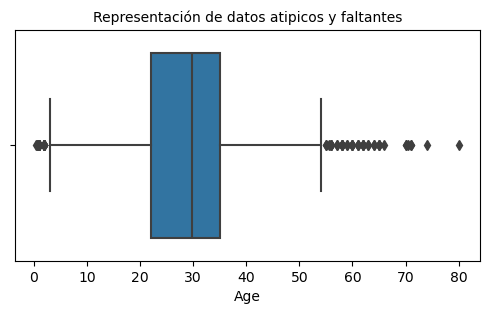

In [24]:
# Reemplazar valores Atripicos
# Calcular cuartiles y IQR
q1 = 20.125000
q3 = 38.000000 
iqr = q3 - q1

# Calcular límites de los bigotes
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
print("Limite inferior es: ", limite_inferior)
print("Limite superior es: ", limite_superior )

#Contar datos atipicos
nivel_min = limite_inferior
nivel_max = limite_superior
Total_Antipicos=((db['Age']<nivel_min)|(db['Age']>nivel_max)).sum()
print("El total de los datos atipicos es {}".format(Total_Antipicos))

#Graficar
plt.figure(figsize=(6,3))
sns.boxplot(x=db['Age'])
plt.title('Representación de datos atipicos y faltantes', fontsize=10)
#Text(0.5, 1.0, 'Identificación datos atipicos')

In [25]:
# Reemplazar valores Atripicos
# Reemplazar valores Atripicos
# Calcular cuartiles y IQR
q1 = 20.125000
q3 = 38.000000 
iqr = q3 - q1

# Calcular límites de los bigotes
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
# Calcular la media de la columna 'Age'
mean_age = db['Age'].mean()
# Reemplazar los outliers en la columna 'Age' con la media
db.loc[(db['Age'] < limite_inferior) | (db['Age'] > limite_superior), 'Age'] = mean_age


In [ ]:
# Validar que los datos faltantes fueron reemplazados
# Calcular cuartiles y IQR
q1 = 20.125000
q3 = 38.000000 
iqr = q3 - q1

# Calcular límites de los bigotes
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
print("Limite inferior es: ", limite_inferior)
print("Limite superior es: ", limite_superior )

#Contar datos atipicos
nivel_min = limite_inferior
nivel_max = limite_superior
Total_Antipicos=((db['Age']<nivel_min)|(db['Age']>nivel_max)).sum()
print("El total de los datos atipicos es {}".format(Total_Antipicos))

#Validar si se eliminaron datos atípicos
Total_Antipicos=((Datos['selling_price']<nivel_min)|(Datos['selling_price']>nivel_max)).sum()
print("El total de los datos atipicos es {}".format(Total_Antipicos))

In [ ]:
#Revisar tipo de datos y datos faltantes
db.info()

## 3.Selección de característica más relevante

In [26]:
#3.Selección de carácteristicas más relevantes para entrenar el modelo
db['Age'].value_counts()


Age
29.699118    188
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
12.000000      1
0.670000       1
36.500000      1
0.420000       1
34.500000      1
Name: count, Length: 82, dtype: int64

In [27]:
db['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
db['Sex'].value_counts()

In [ ]:
db['Pclass'].value_counts()

In [29]:
# Seleccionar las características (X) y la variable objetivo (y)
X = db[['Survived']].values  
Y = db['Age'].values   

In [34]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 14.1 KB


## 4.Dividir la base de datos en train y test para evaluación de modelo

In [35]:
#Dividir data en train y test para evaluar correctamente el modelo
#Porcentaje de datos para entrenamiento (train) = 75% y para prueba (test) = 25%
#Se crean variables para almacenar la información
#X = Datos.drop('selling_price', axis=1) #Se cargan los datos en train sin los datos de la columna
#Y = Datos['selling_price'] #Se cargan los datos en train con los datos de la columna precio

#La función train_test_split crea una divición de un conjunto de datos bloques uno de entrenamiento y otro de prueba (train and test)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 0)

db = db[['Survived', 'Age']]
X = db.drop('Age',axis=1)
Y = db['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 0)

In [36]:
print (X_train)

     Survived
105         0
68          1
253         0
320         0
706         1
..        ...
835         1
192         1
629         0
559         1
684         0

[668 rows x 1 columns]


In [37]:
print (Y_train)

105    0
68     1
253    0
320    0
706    1
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 668, dtype: int64


## 5.Entrenar modelo configurando diferentes hiperparámetros.

In [38]:
#5.Entrenamiento el modelo configurado los diferentes hiperparámetros
#Contruir el modelo de regreción logistica
modelo_regresion = LogisticRegression(solver = "liblinear") # librinear es una libreria para resolver problemas lineales de clasificación y regreción
##Diferencia con respecto a regreción linea
# modelo_regresion = LinearRegression(solver = "liblinear") # librinear es una libreria para resolver problemas lineales de clasificación y regreción
modelo_regresion.fit (X_train, Y_train)
#crear el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) #la funcion predict  predice los valores  a partir de conjunto de datos de vaidación

db = db[['Survived', 'Age']]
X = db.drop('Survived',axis=1)
Y = db['Age']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 0)


In [39]:
print (Prediccion)

[0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1
 1]


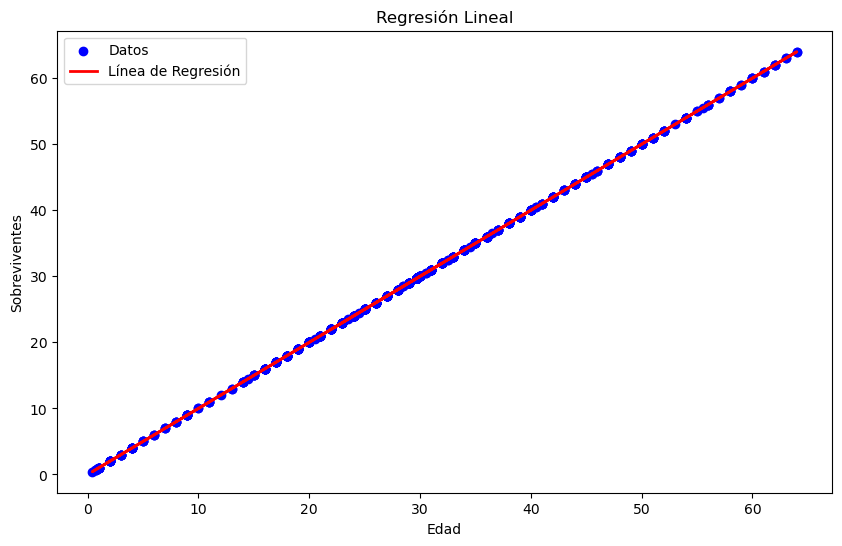

In [40]:
# Crear una instancia del modelo de regresión lineal
modelo = LinearRegression()
# Ajustar el modelo a los datos de entrenamiento
modelo.fit(X_train, Y_train)

# Seleccionar una característica para la visualización (por ejemplo, 'X1')
X1 = db[['Age']].values

# Predecir los valores de Y utilizando el modelo ajustado
y_pred = modelo.predict(X)

# Graficar los datos y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(X1, y, color='blue', label='Datos')
plt.plot(X1, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('Edad')
plt.ylabel('Sobreviventes')
plt.legend()
plt.show()

## 6. Evaluación de desempeños del modelo

In [42]:
# Calcular métricas de evaluación
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_train, Prediccion)
print(f'MSE: {mse}')
import numpy as np

rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

ValueError: Found input variables with inconsistent numbers of samples: [668, 223]

In [43]:
#Matriz de confución modelo
cm=confusion_matrix(Y_test, Prediccion)
disp=matrics.ConfusionMatrixDisplay(cofusion_matrixscm)
disp.plot()

NameError: name 'confusion_matrix' is not defined